<a href="https://colab.research.google.com/github/RodrigoGuedesDP/Data-Analytics/blob/main/01_DataDiscovery_MissingImpute_Guedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Discovery - Ames housing dataset**

---


### Imputación de datos.

Rodrigo Guedes
[rodrigo.guedes@utec.edu.pe](mailto:rodrigo.guedes@utec.edu.pe)

---


### <b>0. Libraries, Functions, etc. </b>

**Libraries**

In [2]:
# Librerías utilizadas para la imputación de datos faltantes y análisis exploratorio de datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.impute import KNNImputer

### 1. Lectura de Datos

In [ ]:
# Carga del dataset AmesHousing desde GitHub y copia del DataFrame original para preservar los datos sin procesar
ruta =
df = pd.read_csv(ruta)
df_original =  df.copy()
print("Primeras filas del DataFrame:")
print(df.head(), "\n")

Primeras filas del DataFrame:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale C

### 2. Diagnóstico de los datos

In [ ]:
# Visualización del tamaño del DataFrame en términos de filas y columnas
print(f"Tamaño del DataFrame: {df.shape[0]} filas × {df.shape[1]} columnas\n")

Tamaño del DataFrame: 2930 filas × 82 columnas



In [ ]:
# Visualización de estadísticas descriptivas para las columnas numéricas del DataFrame
print("Estadísticas descriptivas (numéricas):")
display(df.describe())
print()

Estadísticas descriptivas (numéricas):


Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 39 columns]

In [ ]:
# Visualización de estadísticas descriptivas para las columnas categóricas del DataFrame
print("Estadísticas descriptivas (categóricas):")
display(df.describe(include=['object', 'category']))
print()

Estadísticas descriptivas (categóricas):


MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
count       2930   2930   198      2930         2930      2930       2930   
unique         7      2     2         4            4         3          5   
top           RL   Pave  Grvl       Reg          Lvl    AllPub     Inside   
freq        2273   2918   120      1859         2633      2927       2140   

       Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
count        2930         2930        2930  ...        2773          2771   
unique          3           28           9  ...           6             3   
top           Gtl        NAmes        Norm  ...      Attchd           Unf   
freq         2789          443        2522  ...        1731          1231   

       Garage Qual Garage Cond Paved Drive Pool QC  Fence Misc Feature  \
count         2771        2771        2930      13    572          106   
unique           5           5           3       4      4            5   
top             TA          TA           Y      Ex  MnPrv         Shed   
freq          2615        2665        2652       4    330           95   

       Sale Type Sale Condition  
count       2930           2930  
unique        10              6  
top          WD          Normal  
freq        2536           2413  

[4 rows x 43 columns]

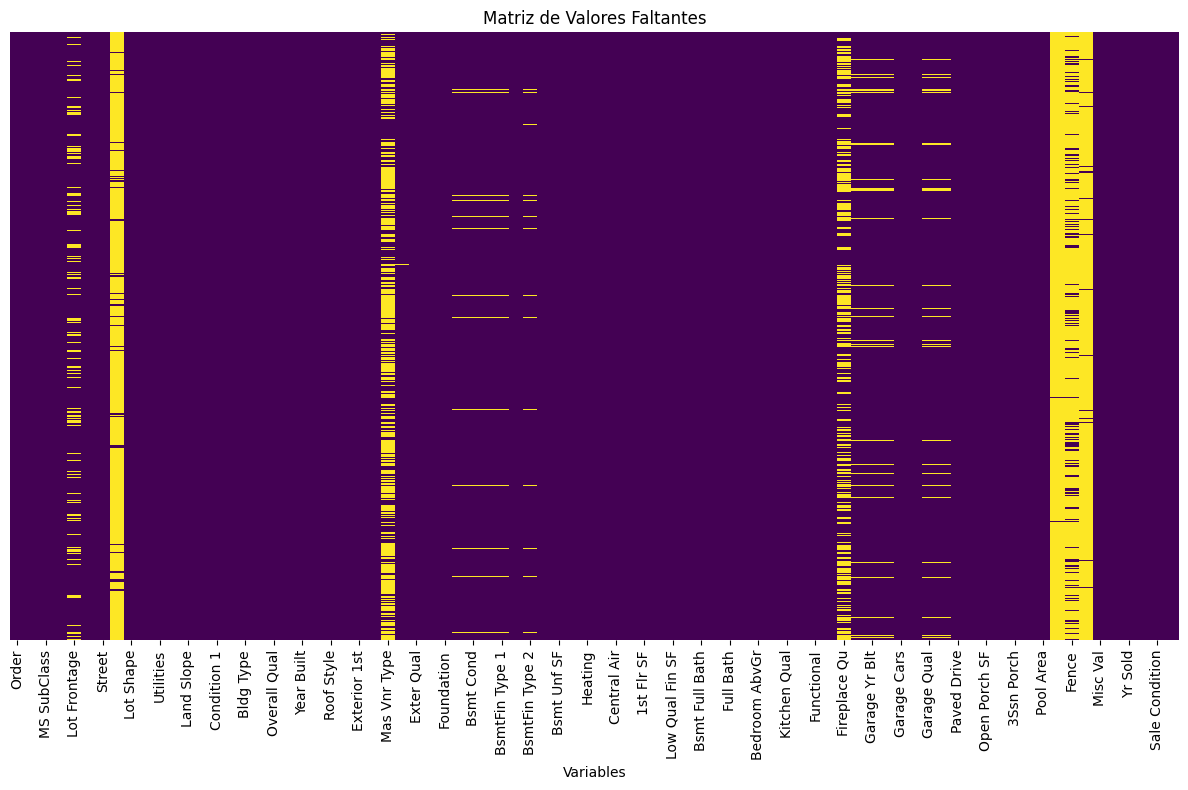

In [ ]:
# Visualización gráfica del patrón de valores faltantes en el DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Matriz de Valores Faltantes')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

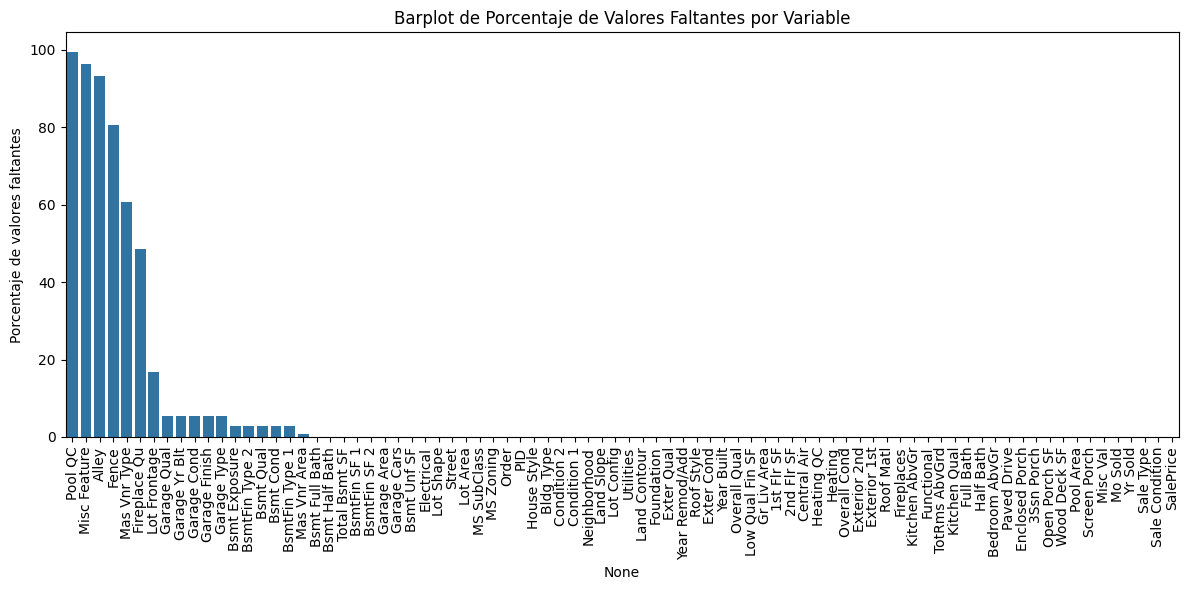

In [ ]:
# Cálculo y visualización del porcentaje de valores faltantes por variable usando un gráfico de barras
missing_pct = df.isnull().mean() * 100
missing_pct = missing_pct.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_pct.index, y=missing_pct.values)
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de valores faltantes')
plt.title('Barplot de Porcentaje de Valores Faltantes por Variable')
plt.tight_layout()
plt.show()

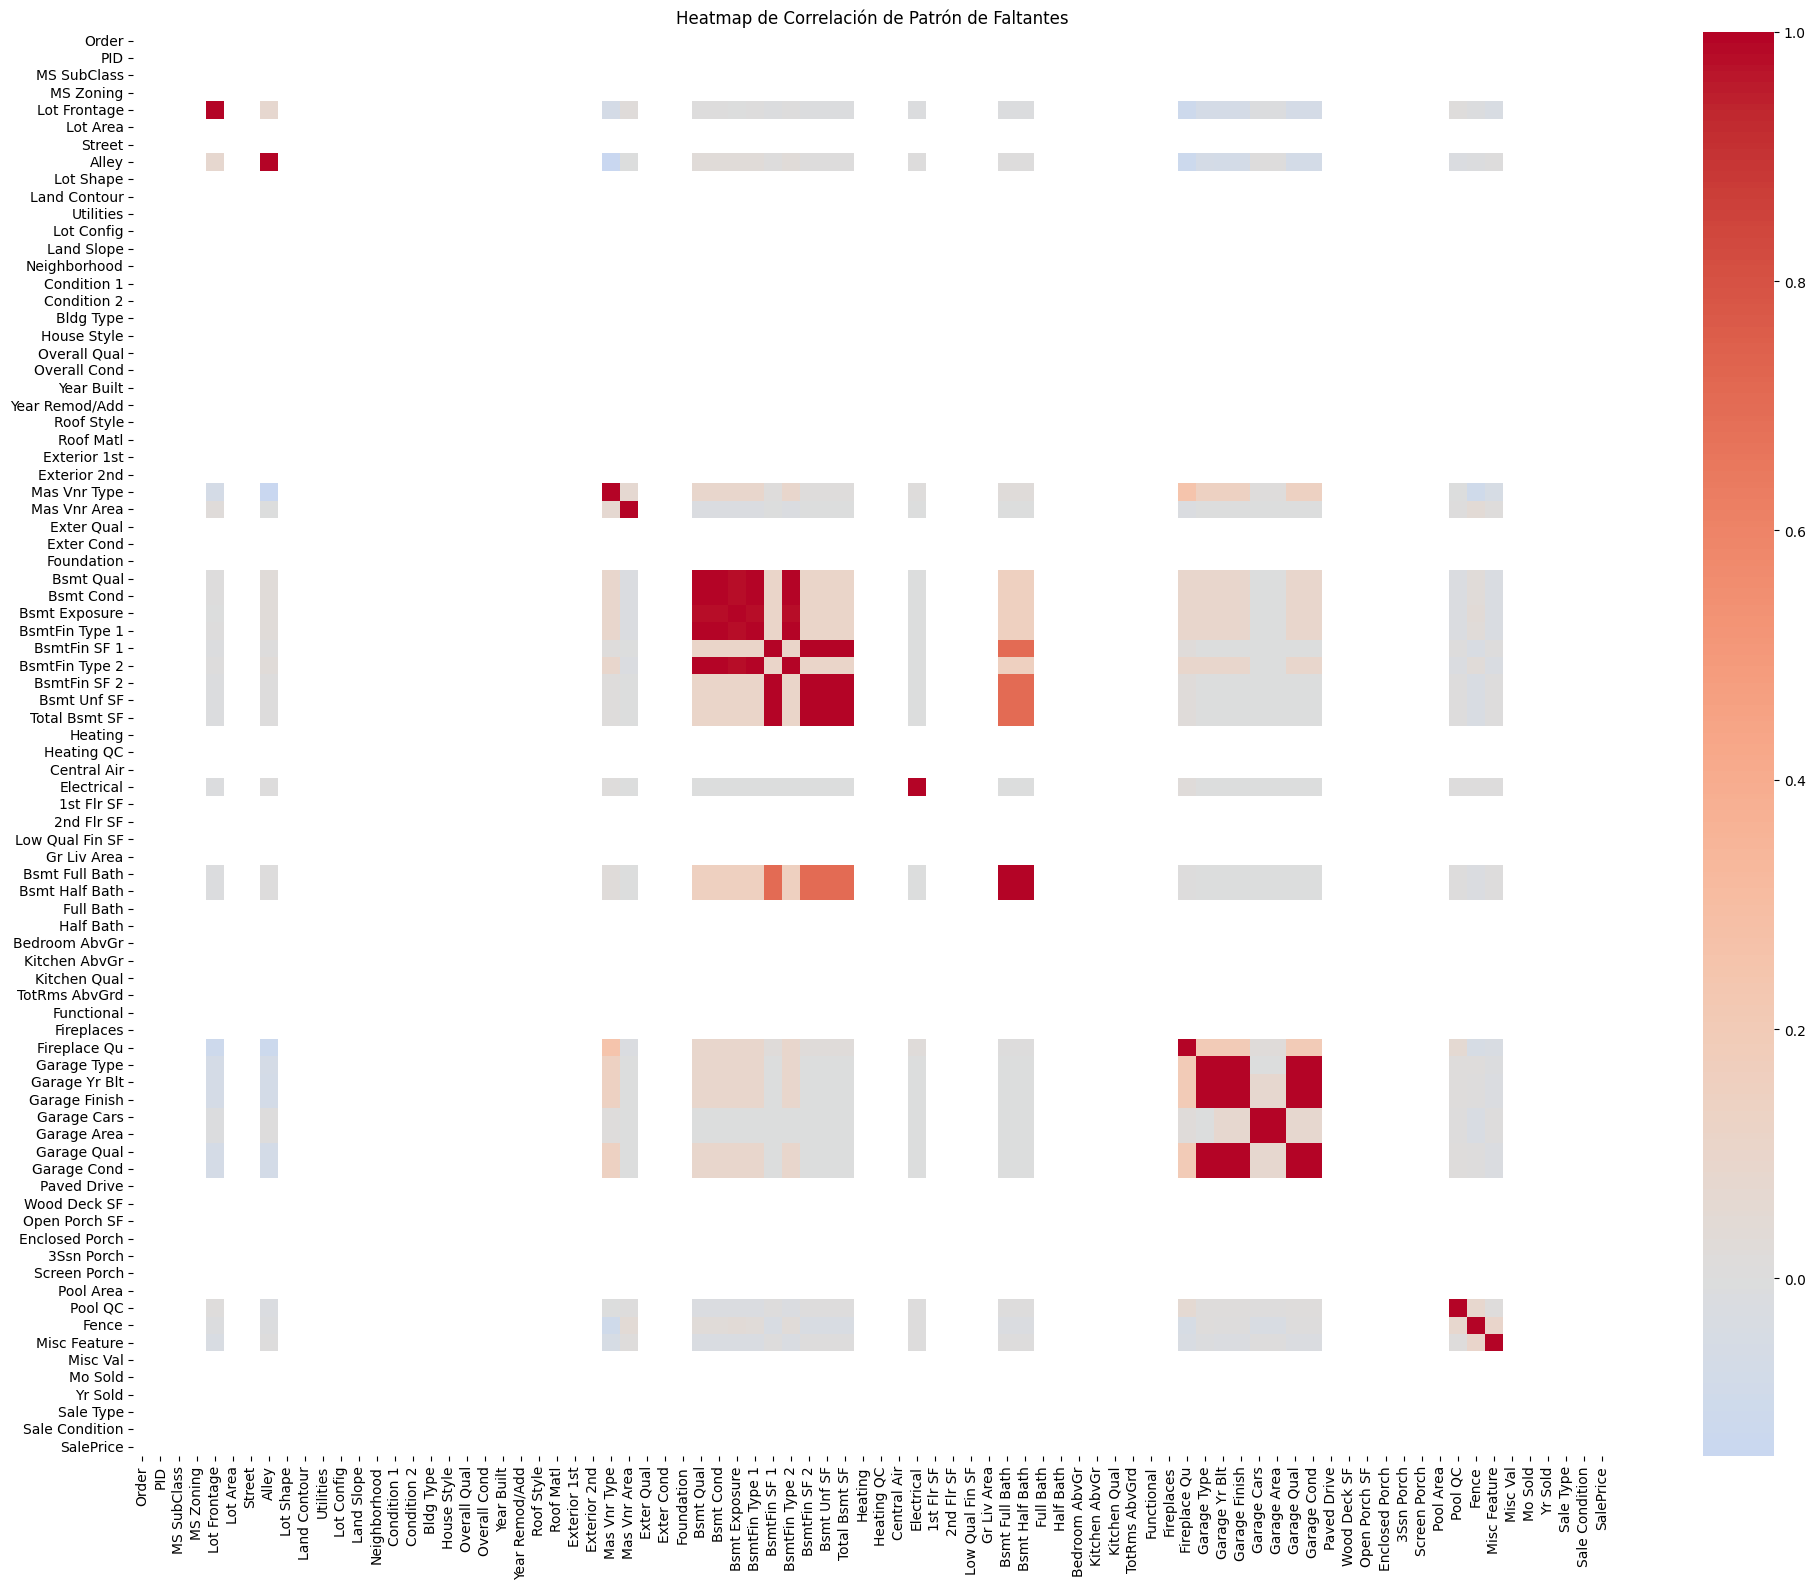

In [ ]:
# Cálculo y visualización de la correlación entre los patrones de valores faltantes de las variables
missing_corr = df.isnull().corr()

plt.figure(figsize=(20, 16))
sns.heatmap(missing_corr, cmap='coolwarm', center=0,
            xticklabels=True, yticklabels=True)
plt.title('Heatmap de Correlación de Patrón de Faltantes')
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-3308501083.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(df, diagonal='kde', ax=ax)


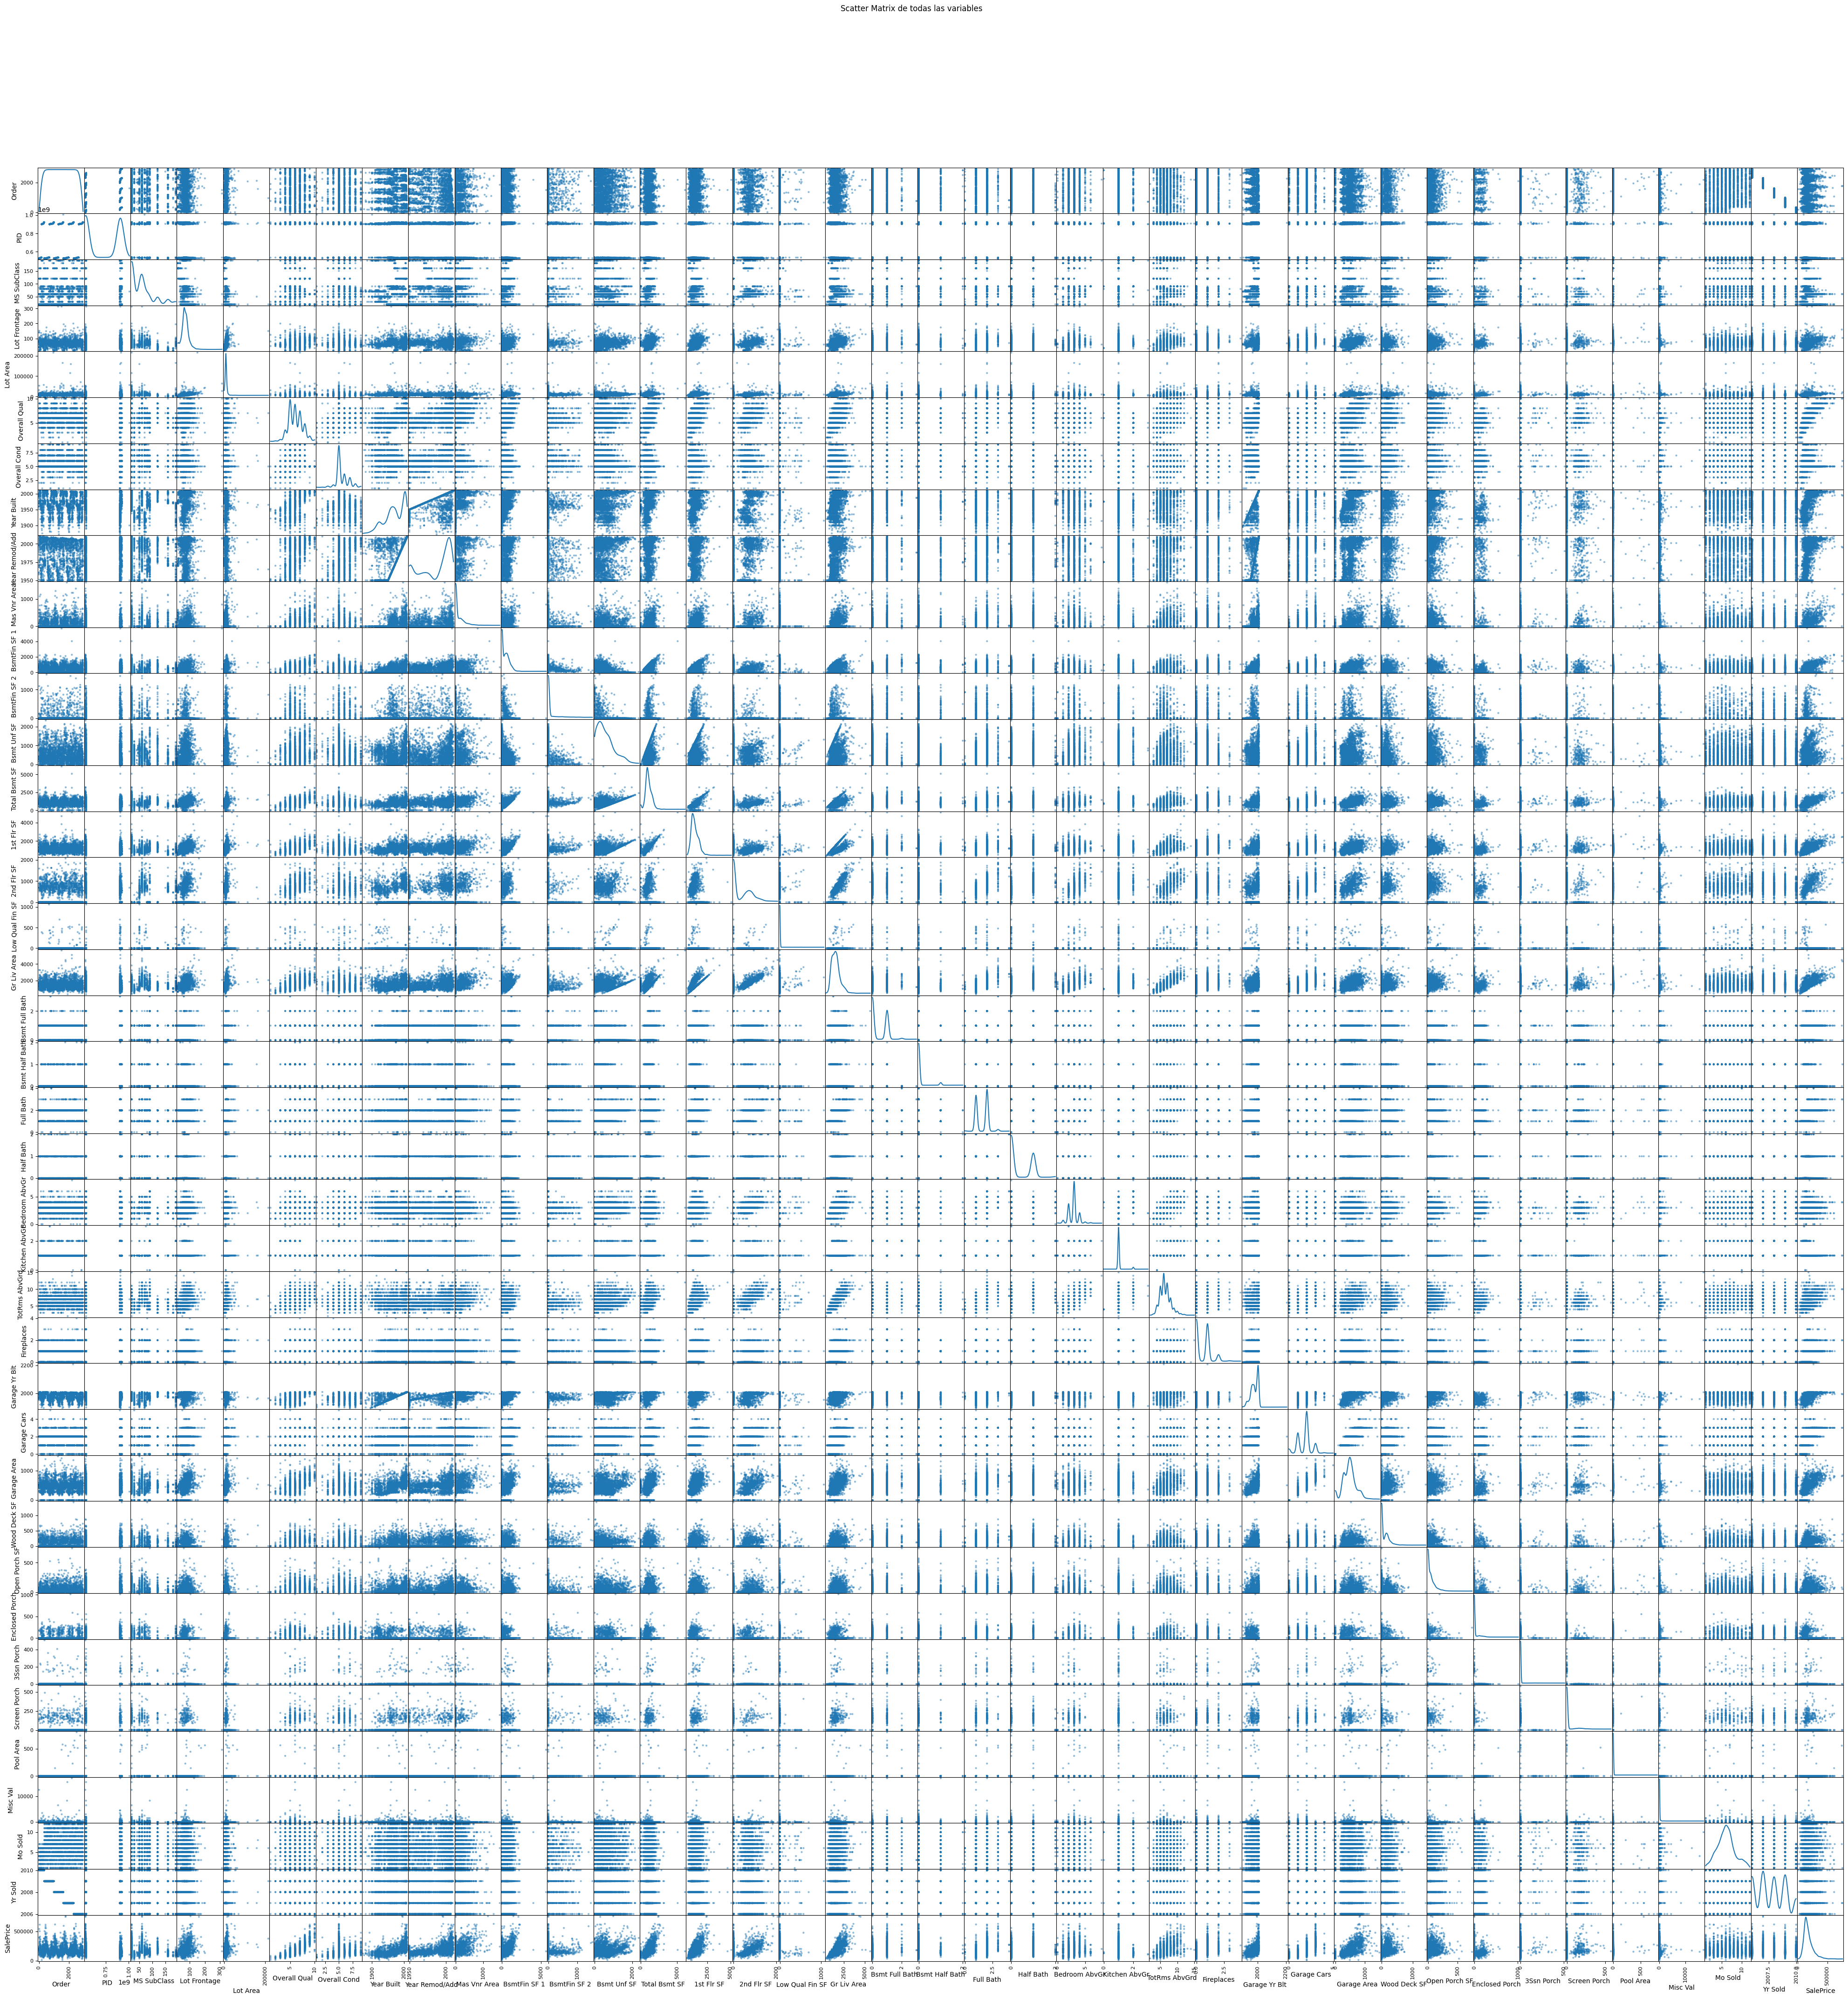

In [ ]:
# Visualización de la matriz de dispersión (scatter matrix) para explorar relaciones entre variables numéricas
fig, ax = plt.subplots(figsize=(50, 50))
scatter_matrix(df, diagonal='kde', ax=ax)
plt.suptitle('Scatter Matrix de todas las variables', y=0.95)
plt.show()

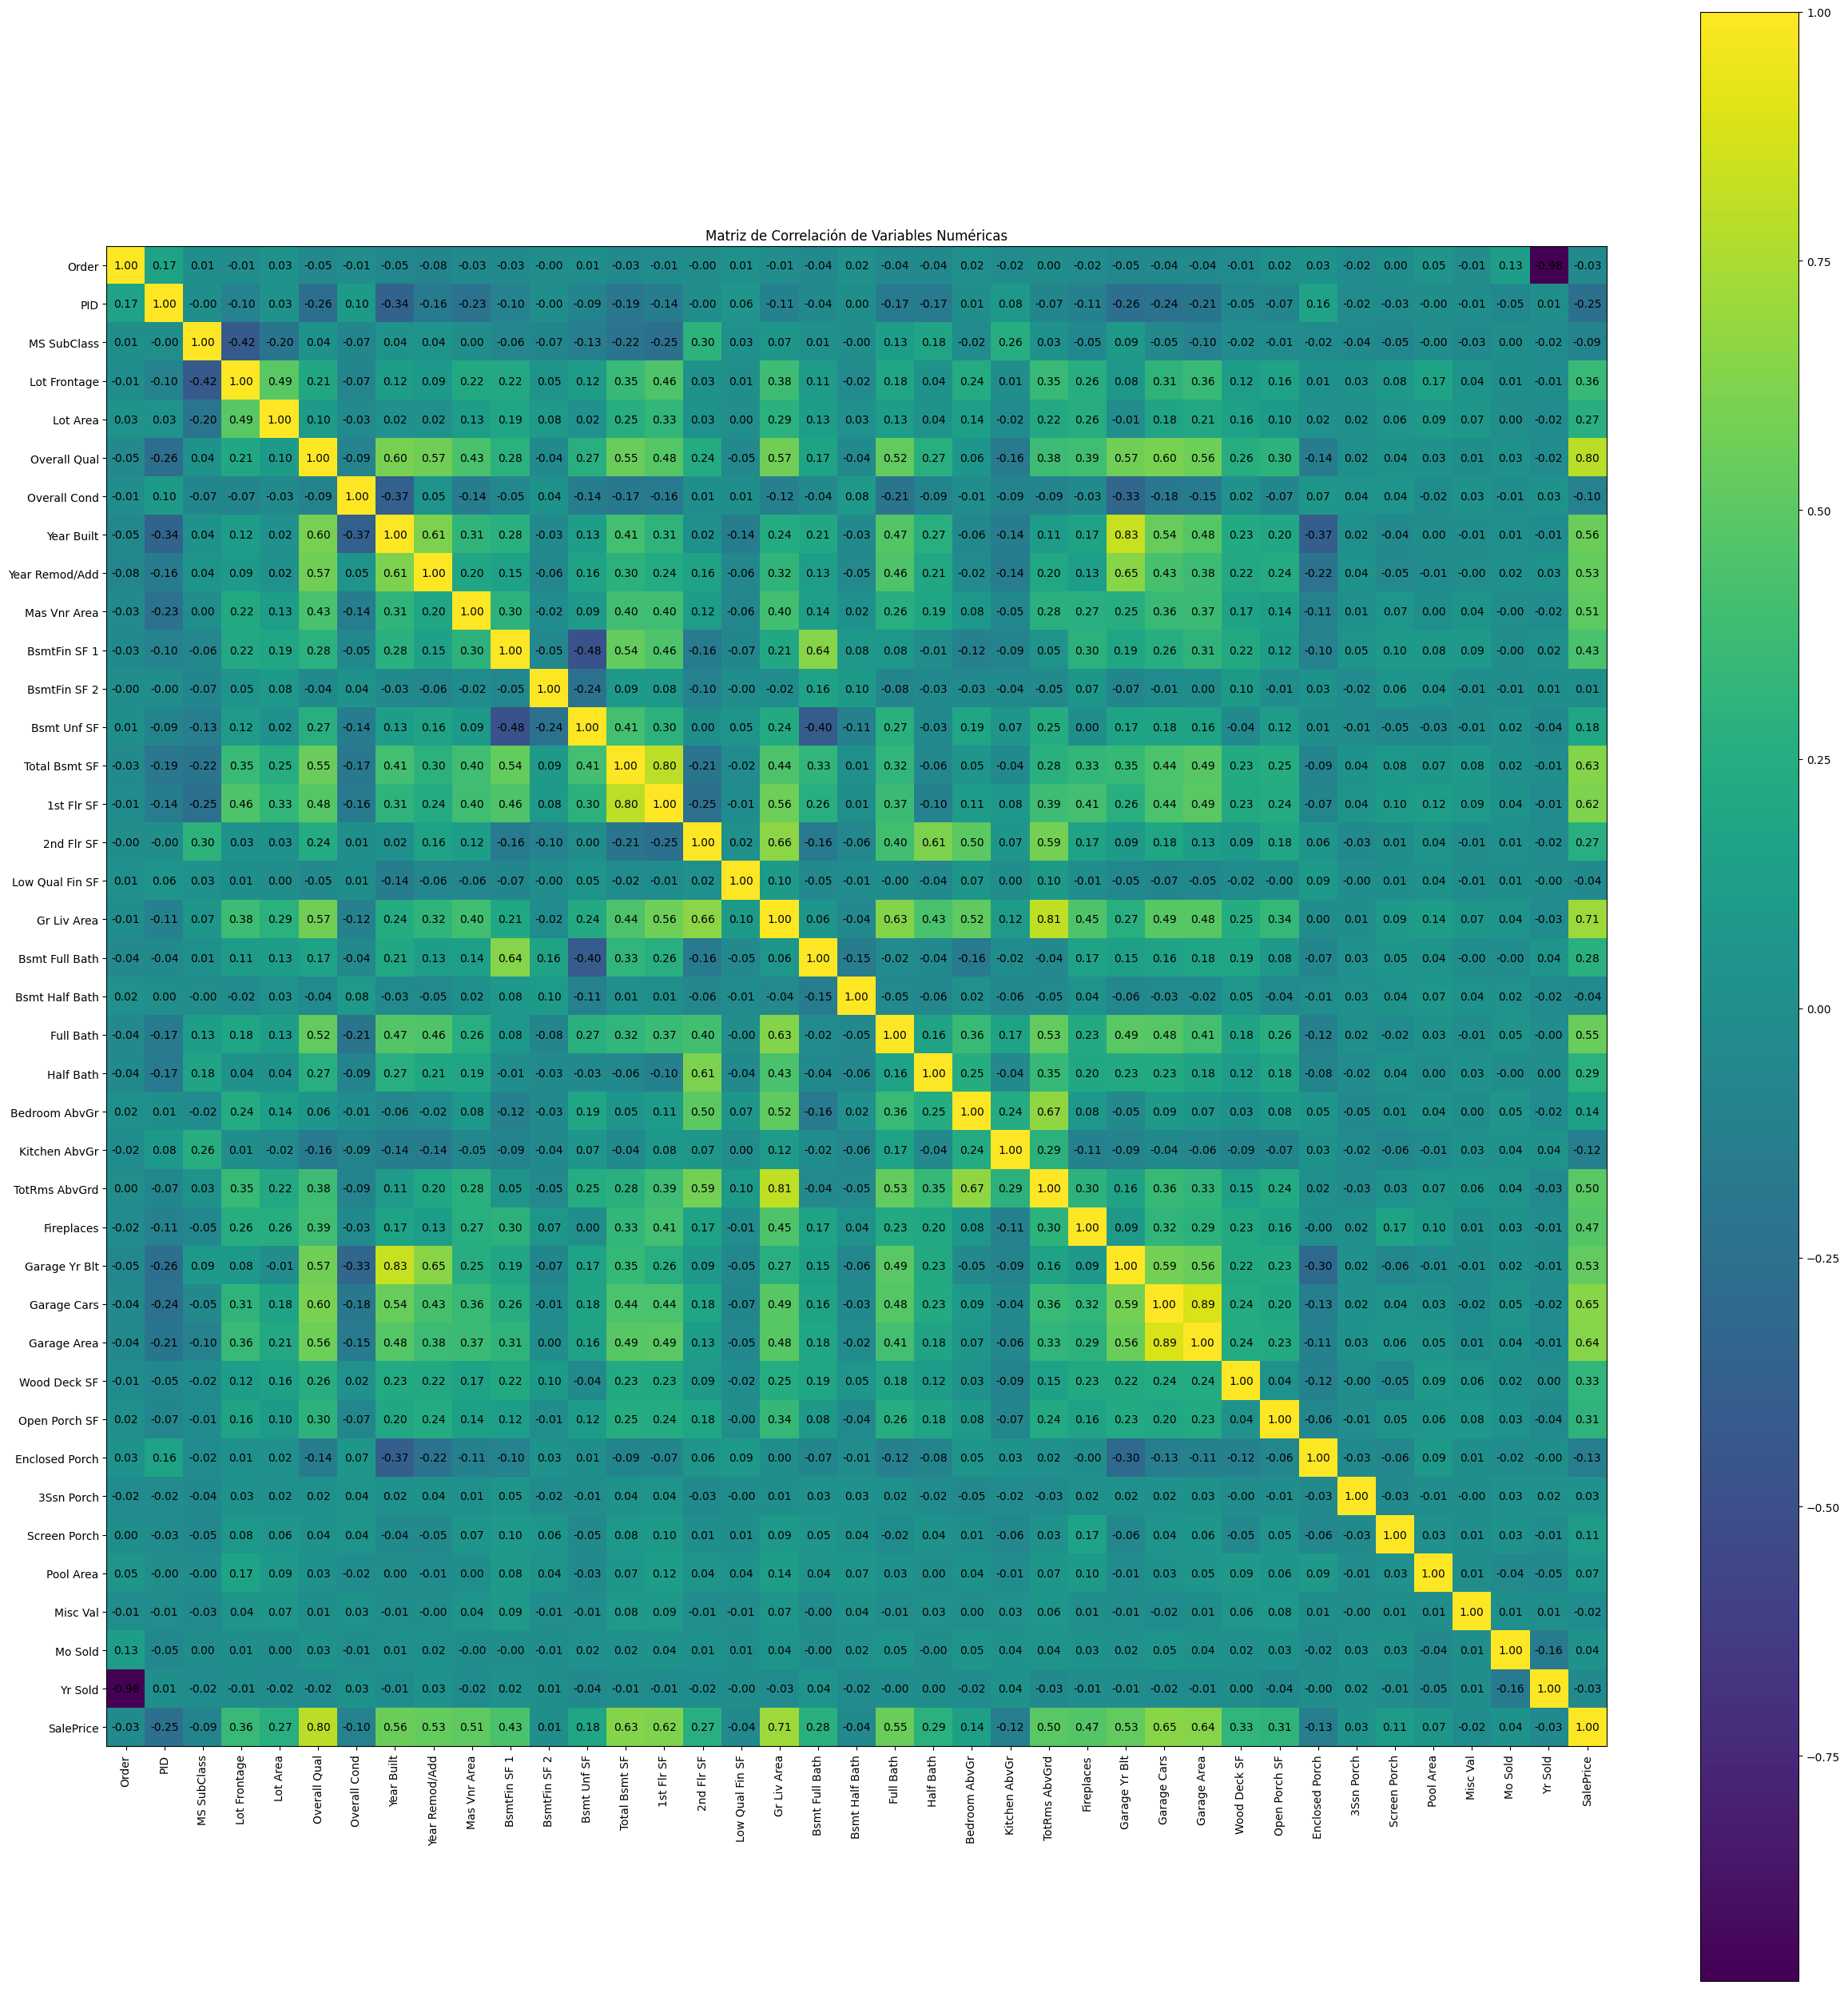

In [ ]:

numeric_df = df.select_dtypes(include=[np.number])

# Calcular matriz de correlación
corr = numeric_df.corr()

# Graficar heatmap con anotaciones
fig, ax = plt.subplots(figsize=(25, 25))
cax = ax.imshow(corr.values, aspect='equal', interpolation='nearest')
fig.colorbar(cax)

# Configurar etiquetas de ejes
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.index)

# Anotar coeficientes de correlación
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha='center', va='center')

plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

In [ ]:
# Exploración de variables categóricas: conteo de frecuencia para cada categoría, incluyendo valores nulos

# Seleccionamos columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Imprimimos conteo de cada categoría por columna
for col in cat_cols:
    print(f"Columna: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 40)

Columna: MS Zoning
MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64
----------------------------------------
Columna: Street
Street
Pave    2918
Grvl      12
Name: count, dtype: int64
----------------------------------------
Columna: Alley
Alley
NaN     2732
Grvl     120
Pave      78
Name: count, dtype: int64
----------------------------------------
Columna: Lot Shape
Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64
----------------------------------------
Columna: Land Contour
Land Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
----------------------------------------
Columna: Utilities
Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
----------------------------------------
Columna: Lot Config
Lot Config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Nam

### 3. Análisis e imputación de datos faltantes

In [ ]:
# Resumen de valores únicos y valores faltantes por columna, ordenado por cantidad de faltantes

unique_counts = df.nunique()
null_counts   = df.isnull().sum()
summary = pd.DataFrame({
    'unique_values': unique_counts,
    'missing_count': null_counts,
    'missing_pct': df.isnull().mean() * 100
}).sort_values(by='missing_count', ascending=False)
print("Valores únicos y faltantes por columna:")
display(summary)

Valores únicos y faltantes por columna:


unique_values  missing_count  missing_pct
Pool QC                     4           2917    99.556314
Misc Feature                5           2824    96.382253
Alley                       2           2732    93.242321
Fence                       4           2358    80.477816
Mas Vnr Type                4           1775    60.580205
...                       ...            ...          ...
Mo Sold                    12              0     0.000000
Yr Sold                     5              0     0.000000
Sale Type                  10              0     0.000000
Sale Condition              6              0     0.000000
SalePrice                1032              0     0.000000

[82 rows x 3 columns]

#### **1. Primer grupo:  Atributos con ausencia masiva (≥ 45 %) - MNAR estructural**


In [ ]:
# Imputación de valores faltantes en atributos con ausencia masiva (MNAR estructural), preservando la señal de inexistencia del atributo

impute_map = {
    'Pool QC': 'No Pool',
    'Misc Feature': 'None',
    'Alley': 'No Alley',
    'Fence': 'No Fence',
    'Mas Vnr Type': 'No Mas Vnr',
    'Fireplace Qu': 'No Fireplace'
}
# Imputamos Alley y Fence donde haya NaN
df['Alley'] = df['Alley'].fillna(impute_map['Alley'])
df['Fence'] = df['Fence'].fillna(impute_map['Fence'])
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

# Pool QC,  Misc Feature y Mas Vnr Type→ sólo si Area es 0 o NaN
mask_pool = df['Pool QC'].isna() & (
    df['Pool Area'].isna() | (df['Pool Area'] == 0)
)
df.loc[mask_pool, 'Pool QC'] = impute_map['Pool QC']
#
mask_misc = df['Misc Feature'].isna() & (
    df['Misc Val'].isna() | (df['Misc Val'] == 0)
)
df.loc[mask_misc, 'Misc Feature'] = impute_map['Misc Feature']
#
mask_mas = df['Mas Vnr Type'].isna() & (
    df['Mas Vnr Area'].isna() | (df['Mas Vnr Area'] == 0)
)
df.loc[mask_mas, 'Mas Vnr Type'] = impute_map['Mas Vnr Type']
#
mask_fire = df['Fireplace Qu'].isna() & (
    df['Fireplace Qu'].isna() | (df['Fireplace Qu'] == 0)
)
df.loc[mask_fire, 'Fireplace Qu'] = impute_map['Fireplace Qu']

Valores únicos y faltantes por columna:


unique_values  missing_count  missing_pct
Lot Frontage              128            490    16.723549
Garage Finish               3            159     5.426621
Garage Cond                 5            159     5.426621
Garage Qual                 5            159     5.426621
Garage Yr Blt             103            159     5.426621
...                       ...            ...          ...
Mo Sold                    12              0     0.000000
Yr Sold                     5              0     0.000000
Sale Type                  10              0     0.000000
Sale Condition              6              0     0.000000
SalePrice                1032              0     0.000000

[82 rows x 3 columns]

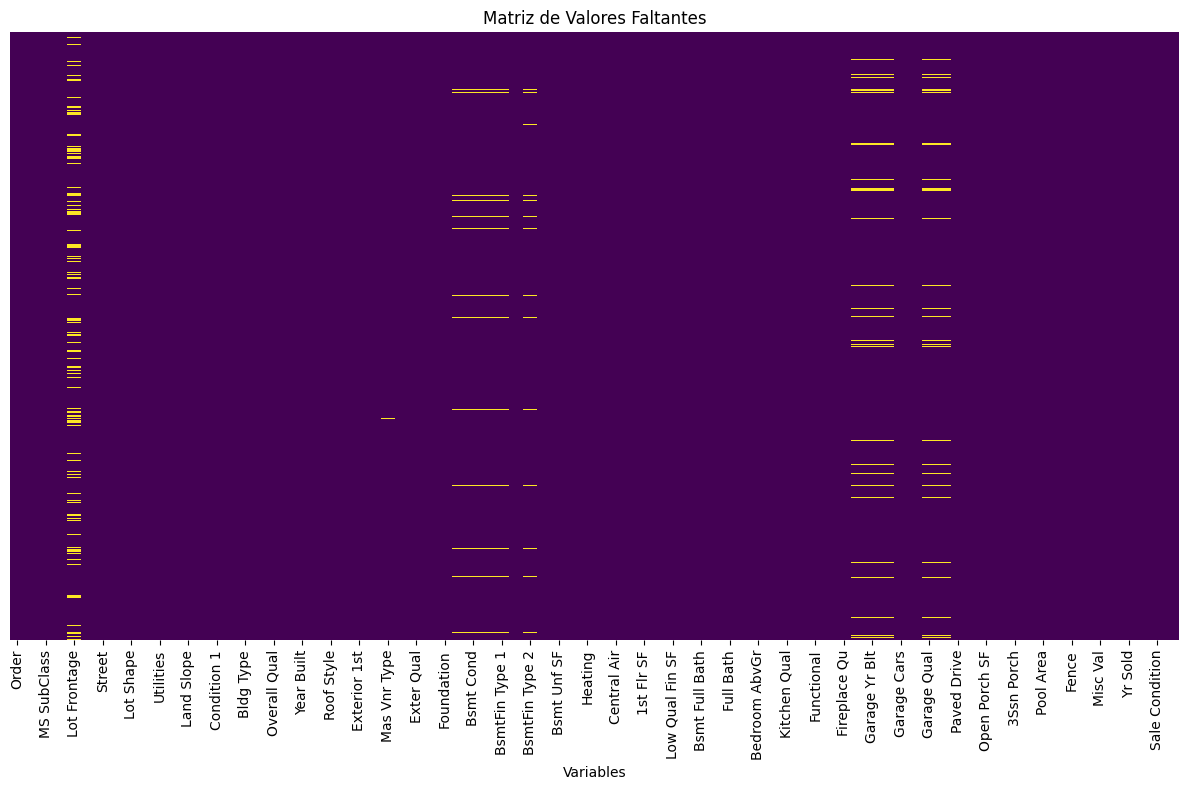

In [ ]:
# Revisión general posterior a la imputación: resumen de valores únicos, cantidad y porcentaje de faltantes, junto con visualización del patrón restante de NaNs

unique_counts = df.nunique()
null_counts   = df.isnull().sum()
summary = pd.DataFrame({
    'unique_values': unique_counts,
    'missing_count': null_counts,
    'missing_pct': df.isnull().mean() * 100
}).sort_values(by='missing_count', ascending=False)
print("Valores únicos y faltantes por columna:")
display(summary)

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Matriz de Valores Faltantes')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

#### **2. Ausencia intermedia (17 % – 5 %) - mezcla MAR / MNAR**



In [ ]:


lot_before = df['Lot Frontage'].copy()
# Imputación a 0 para Inside/CulDSac
mask_zero = lot_before.isna() & df['Lot Config'].isin(['Inside','CulDSac'])
df.loc[mask_zero, 'Lot Frontage'] = 0
# Imputación KNN para el resto de Lot Frontage
features = ['Lot Frontage', 'Lot Area', 'MS SubClass', '1st Flr SF']
X_num = df[features].copy()
dummies = pd.get_dummies(df['Lot Config'], prefix='LotConfig', drop_first=True)
X = pd.concat([X_num, dummies], axis=1)
imputer = KNNImputer(n_neighbors=30)
X_filled = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=df.index)
df['Lot Frontage'] = X_filled['Lot Frontage']

# Estadísticos antes y después
stats = pd.DataFrame({
    'Antes': {
        'count': lot_before.count(),
        'mean': lot_before.mean(),
        'median': lot_before.median(),
        'var': lot_before.var(),
        'std': lot_before.std(),
        'min': lot_before.min(),
        'max': lot_before.max()
    },
    'Después': {
        'count': df['Lot Frontage'].count(),
        'mean': df['Lot Frontage'].mean(),
        'median': df['Lot Frontage'].median(),
        'var': df['Lot Frontage'].var(),
        'std': df['Lot Frontage'].std(),
        'min': df['Lot Frontage'].min(),
        'max': df['Lot Frontage'].max()
    }
}).T  # Transponemos para ver filas = Antes/Después

print(stats)

          count       mean  median         var        std   min    max
Antes    2440.0  69.224590    68.0  545.938878  23.365335  21.0  313.0
Después  2930.0  60.437531    64.0  976.119018  31.242903   0.0  313.0


In [ ]:


df['Garage Area'] = df['Garage Area'].fillna(0)
df['Garage Cars'] = df['Garage Cars'].fillna(0)
# Crear indicador binario HasGarage (1 si tiene garage, 0 si no)
df['Has Garage'] = (df['Garage Cars'] > 0).astype(int)
df['Garage Age'] = df['Yr Sold'] - df['Garage Yr Blt']

# Imputar categorías de garage como “NoGarage” en variables categóricas
garage_cat_cols = ['Garage Finish', 'Garage Cond', 'Garage Qual', 'Garage Type']
for col in garage_cat_cols:
    df[col] = df[col].fillna('NoGarage')

df.drop(columns=['Garage Yr Blt'], inplace=True)

# Mostrar primeras filas para confirmar cambios
df[['Has Garage', 'Garage Age'] + garage_cat_cols].head()
df['Garage Age'] = df['Garage Age'].fillna(0)

Valores únicos y faltantes por columna:


unique_values  missing_count  missing_pct
Bsmt Exposure               4             83     2.832765
BsmtFin Type 2              6             81     2.764505
BsmtFin Type 1              6             80     2.730375
Bsmt Cond                   5             80     2.730375
Bsmt Qual                   5             80     2.730375
...                       ...            ...          ...
Sale Type                  10              0     0.000000
Sale Condition              6              0     0.000000
SalePrice                1032              0     0.000000
Has Garage                  2              0     0.000000
Garage Age                111              0     0.000000

[83 rows x 3 columns]

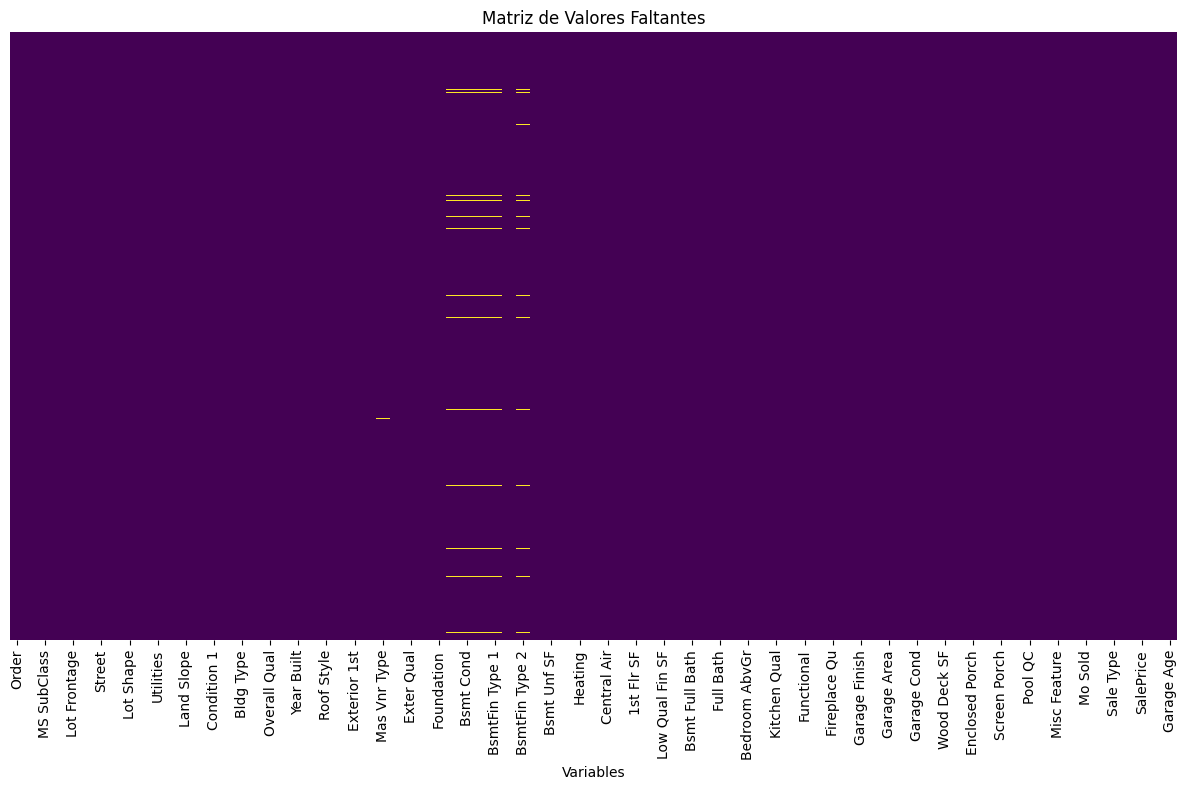

In [ ]:


unique_counts = df.nunique()
null_counts   = df.isnull().sum()
summary = pd.DataFrame({
    'unique_values': unique_counts,
    'missing_count': null_counts,
    'missing_pct': df.isnull().mean() * 100
}).sort_values(by='missing_count', ascending=False)
print("Valores únicos y faltantes por columna:")
display(summary)

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Matriz de Valores Faltantes')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

#### **3. Tercer grupo:  Ausencia baja (≤ 5 %) - tratamiento pragmático**


In [ ]:

num_cols = [
    'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2',
    'Bsmt Half Bath', 'Bsmt Full Bath', 'Bsmt Unf SF'
]
for col in num_cols:
    df[col] = df[col].fillna(0)

# Imputación de nueva categoría "No Bsmt" para variables categóricas de sótano
cat_cols = [
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Bsmt Cond', 'Bsmt Qual'
]
for col in cat_cols:
    df[col] = df[col].fillna('No Bsmt')


In [ ]:
# Calcular la moda de Mas Vnr Type (excluyendo el valor 'No Mas Vnr')
mode_mas_vnr = df.loc[df['Mas Vnr Type'] != 'No Mas Vnr', 'Mas Vnr Type'].mode()[0]

mask_missing_type = df['Mas Vnr Area'] > 0
mask_missing_type &= df['Mas Vnr Type'].isna()

# Imputar la moda en esos casos
df.loc[mask_missing_type, 'Mas Vnr Type'] = mode_mas_vnr

In [ ]:
# Calcular la moda de Electrical (excluyendo NaN)
mode_elec = df['Electrical'].mode()[0]
# Imputar el único valor faltante con la moda
df['Electrical'].fillna(mode_elec, inplace=True)

/tmp/ipython-input-21-3450529922.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna(mode_elec, inplace=True)


Valores únicos y faltantes por columna:


unique_values  missing_count  missing_pct
Order                    2930              0          0.0
PID                      2930              0          0.0
MS SubClass                16              0          0.0
MS Zoning                   7              0          0.0
Lot Frontage              244              0          0.0
...                       ...            ...          ...
Sale Type                  10              0          0.0
Sale Condition              6              0          0.0
SalePrice                1032              0          0.0
Has Garage                  2              0          0.0
Garage Age                111              0          0.0

[83 rows x 3 columns]

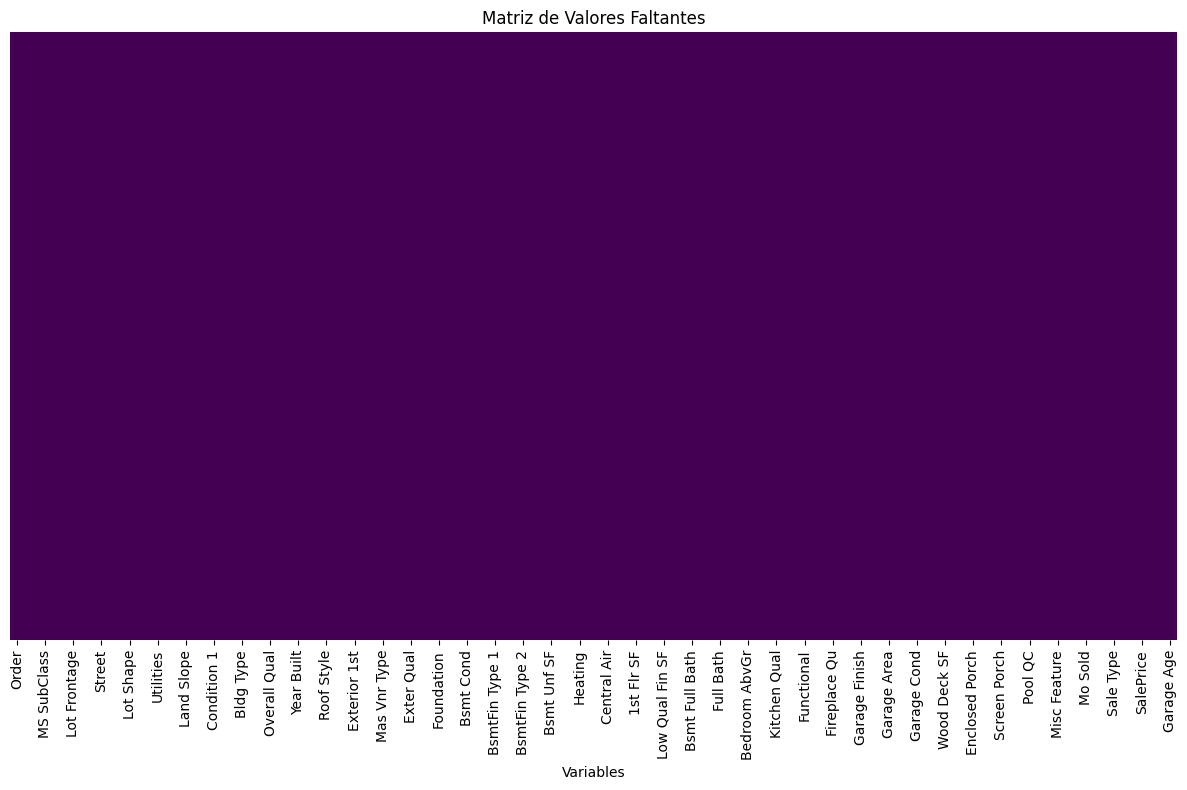

In [ ]:


null_counts   = df.isnull().sum()
summary = pd.DataFrame({
    'unique_values': unique_counts,
    'missing_count': null_counts,
    'missing_pct': df.isnull().mean() * 100
}).sort_values(by='missing_count', ascending=False)
print("Valores únicos y faltantes por columna:")
display(summary)

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Matriz de Valores Faltantes')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

Comparación Final de estadisticas en columnas modificadas por imputación

In [ ]:
# Columnas realmente cambiadas y presentes en ambos DF
common_cols = df.columns.intersection(df_original.columns)
changed_cols = [
    col for col in common_cols
    if not df[col].equals(df_original[col])
]

# Descriptivas numéricas
num_cols = [
    col for col in changed_cols
    if pd.api.types.is_numeric_dtype(df[col])
]
if num_cols:
    desc_orig_num = df_original[num_cols].describe()
    desc_imp_num  = df     [num_cols].describe()
    comparacion_num = pd.concat(
        [desc_orig_num, desc_imp_num],
        axis=1, keys=['Original','Imputado']
    )
    print("► Estadísticas numéricas (Original vs Imputado):")
    display(comparacion_num)
else:
    print("No hay columnas numéricas modificadas.")

# Descriptivas categóricas
cat_cols = [
    col for col in changed_cols
    if pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col])
]
if cat_cols:
    desc_orig_cat = df_original[cat_cols].describe()
    desc_imp_cat  = df     [cat_cols].describe()
    comparacion_cat = pd.concat(
        [desc_orig_cat, desc_imp_cat],
        axis=1, keys=['Original','Imputado']
    )
    print("\n► Estadísticas categóricas (Original vs Imputado):")
    display(comparacion_cat)
else:
    print("No hay columnas categóricas modificadas.")


► Estadísticas numéricas (Original vs Imputado):


Original                                                      \
      Lot Frontage Mas Vnr Area BsmtFin SF 1 BsmtFin SF 2  Bsmt Unf SF   
count  2440.000000  2907.000000  2929.000000  2929.000000  2929.000000   
mean     69.224590   101.896801   442.629566    49.722431   559.262547   
std      23.365335   179.112611   455.590839   169.168476   439.494153   
min      21.000000     0.000000     0.000000     0.000000     0.000000   
25%      58.000000     0.000000     0.000000     0.000000   219.000000   
50%      68.000000     0.000000   370.000000     0.000000   466.000000   
75%      80.000000   164.000000   734.000000     0.000000   802.000000   
max     313.000000  1600.000000  5644.000000  1526.000000  2336.000000   

                                                                             \
      Total Bsmt SF Bsmt Full Bath Bsmt Half Bath  Garage Cars  Garage Area   
count   2929.000000    2928.000000    2928.000000  2929.000000  2929.000000   
mean    1051.614544       0.431352       0.061134     1.766815   472.819734   
std      440.615067       0.524820       0.245254     0.760566   215.046549   
min        0.000000       0.000000       0.000000     0.000000     0.000000   
25%      793.000000       0.000000       0.000000     1.000000   320.000000   
50%      990.000000       0.000000       0.000000     2.000000   480.000000   
75%     1302.000000       1.000000       0.000000     2.000000   576.000000   
max     6110.000000       3.000000       2.000000     5.000000  1488.000000   

          Imputado                                                      \
      Lot Frontage Mas Vnr Area BsmtFin SF 1 BsmtFin SF 2  Bsmt Unf SF   
count  2930.000000  2930.000000  2930.000000  2930.000000  2930.000000   
mean     60.437531   101.096928   442.478498    49.705461   559.071672   
std      31.242903   178.634545   455.586452   169.142089   439.540571   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      50.000000     0.000000     0.000000     0.000000   219.000000   
50%      64.000000     0.000000   370.000000     0.000000   465.500000   
75%      78.450000   162.750000   734.000000     0.000000   801.750000   
max     313.000000  1600.000000  5644.000000  1526.000000  2336.000000   

                                                                             
      Total Bsmt SF Bsmt Full Bath Bsmt Half Bath  Garage Cars  Garage Area  
count   2930.000000    2930.000000    2930.000000  2930.000000  2930.000000  
mean    1051.255631       0.431058       0.061092     1.766212   472.658362  
std      440.968018       0.524762       0.245175     0.761137   215.187196  
min        0.000000       0.000000       0.000000     0.000000     0.000000  
25%      793.000000       0.000000       0.000000     1.000000   320.000000  
50%      990.000000       0.000000       0.000000     2.000000   480.000000  
75%     1301.500000       1.000000       0.000000     2.000000   576.000000  
max     6110.000000       3.000000       2.000000     5.000000  1488.000000


► Estadísticas categóricas (Original vs Imputado):


/tmp/ipython-input-23-1580703666.py:28: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col])


Original                                                                \
          Alley Mas Vnr Type Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1   
count       198         1155      2850      2850          2847           2850   
unique        2            4         5         5             4              6   
top        Grvl      BrkFace        TA        TA            No            GLQ   
freq        120          880      1283      2616          1906            859   

                                                           ...       Imputado  \
       BsmtFin Type 2 Electrical Fireplace Qu Garage Type  ... BsmtFin Type 2   
count            2849       2929         1508        2773  ...           2930   
unique              6          5            5           6  ...              7   
top               Unf      SBrkr           Gd      Attchd  ...            Unf   
freq             2499       2682          744        1731  ...           2499   

                                                                       \
       Electrical  Fireplace Qu Garage Type Garage Finish Garage Qual   
count        2930          2930        2930          2930        2930   
unique          5             6           7             4           6   
top         SBrkr  No Fireplace      Attchd           Unf          TA   
freq         2683          1422        1731          1231        2615   

                                                    
       Garage Cond  Pool QC     Fence Misc Feature  
count         2930     2930      2930         2930  
unique           6        5         5            6  
top             TA  No Pool  No Fence         None  
freq          2665     2917      2358         2824  

[4 rows x 32 columns]